In [72]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [74]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## Data Cleaning

In [75]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], format='%m/%d/%Y')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], format='%m/%d/%Y')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], format='%m/%d/%Y')

In [76]:
df[(df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.0,2014-03-31,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.0,2014-03-31,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,2006-11-10,2007-01-26,Male,5,.,beijing,CN,39.0,2014-03-31,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.0,2014-03-31,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.0,2014-03-31,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,2013-01-11,2013-07-10,Male,4,dalianshi,liaoning,CN,23.0,2014-03-31,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,2009-07-26,2009-07-26,Male,4,tianjin,tianjin,CN,37.0,2014-03-31,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,2011-04-11,2011-04-20,Male,4,guangzhou,guangdong,CN,34.0,2014-03-31,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,2007-10-31,2008-03-13,Male,4,foshan,guangdong,CN,42.0,2014-03-31,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [77]:
#year 2014 is not a leap year, so 29th Feb -> 1st March

df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace(['2014/2/29  0:00:00'], '3/01/2014')

df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], format='%m/%d/%Y')

In [78]:
#drop MEMBER_NO since its different in each row

df = df.drop(['MEMBER_NO'], axis =1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   GENDER             62985 non-null  object        
 3   FFP_TIER           62988 non-null  int64         
 4   WORK_CITY          60719 non-null  object        
 5   WORK_PROVINCE      59740 non-null  object        
 6   WORK_COUNTRY       62962 non-null  object        
 7   AGE                62568 non-null  float64       
 8   LOAD_TIME          62988 non-null  datetime64[ns]
 9   FLIGHT_COUNT       62988 non-null  int64         
 10  BP_SUM             62988 non-null  int64         
 11  SUM_YR_1           62437 non-null  float64       
 12  SUM_YR_2           62850 non-null  float64       
 13  SEG_KM_SUM         62988 non-null  int64         
 14  LAST_F

In [80]:
# Summary of missing value columns

data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,3)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,AGE,420,0.667
4,SUM_YR_2,138,0.219
5,WORK_COUNTRY,26,0.041
6,GENDER,3,0.005


In [81]:
df['LAST_FLIGHT_DATE'].isnull().sum()

0

In [82]:
#the missing value is below 10% so can drop it out

In [83]:
df =df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           58255 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 2   GENDER             58255 non-null  object        
 3   FFP_TIER           58255 non-null  int64         
 4   WORK_CITY          58255 non-null  object        
 5   WORK_PROVINCE      58255 non-null  object        
 6   WORK_COUNTRY       58255 non-null  object        
 7   AGE                58255 non-null  float64       
 8   LOAD_TIME          58255 non-null  datetime64[ns]
 9   FLIGHT_COUNT       58255 non-null  int64         
 10  BP_SUM             58255 non-null  int64         
 11  SUM_YR_1           58255 non-null  float64       
 12  SUM_YR_2           58255 non-null  float64       
 13  SEG_KM_SUM         58255 non-null  int64         
 14  LAST_F

In [84]:
#checking for duplicated values

df.duplicated().sum()

1

In [85]:
#drop duplicates

df.drop_duplicates()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
5,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,92,313338,112364.0,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,2,0,0.0,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
62983,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,2,0,0.0,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
62984,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,4,0,0.0,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
62985,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,2,0,0.0,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


## Data pre-processing for clustering

In [86]:
# based on LRFMC model, (Lenght, Recency, Frequency, Monetary, Average Discount)

df_new = df[['FFP_DATE', 'LOAD_TIME','LAST_TO_END', 'FLIGHT_COUNT', 'avg_discount', 'SEG_KM_SUM']]
df_new = df_new.reset_index()
del df_new['index']

df_new

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,avg_discount,SEG_KM_SUM
0,2006-11-02,2014-03-31,1,210,0.961639,580717
1,2007-02-01,2014-03-31,11,135,1.254676,283712
2,2008-08-22,2014-03-31,97,23,1.090870,281336
3,2009-04-10,2014-03-31,5,152,0.970658,309928
4,2008-02-10,2014-03-31,79,92,0.967692,294585
...,...,...,...,...,...,...
58250,2013-01-20,2014-03-31,437,2,0.000000,3848
58251,2011-05-20,2014-03-31,297,2,0.000000,1134
58252,2010-03-08,2014-03-31,89,4,0.000000,8016
58253,2006-03-30,2014-03-31,29,2,0.000000,2594


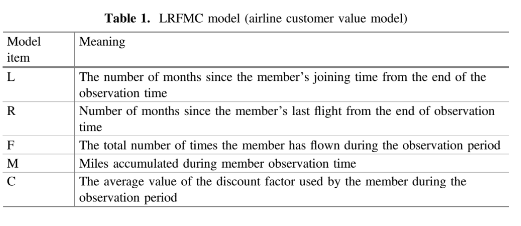

In [87]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58255 entries, 0 to 58254
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FFP_DATE      58255 non-null  datetime64[ns]
 1   LOAD_TIME     58255 non-null  datetime64[ns]
 2   LAST_TO_END   58255 non-null  int64         
 3   FLIGHT_COUNT  58255 non-null  int64         
 4   avg_discount  58255 non-null  float64       
 5   SEG_KM_SUM    58255 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 2.7 MB


In [88]:
df_new.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,avg_discount,SEG_KM_SUM
0,2006-11-02,2014-03-31,1,210,0.961639,580717
1,2007-02-01,2014-03-31,11,135,1.254676,283712
2,2008-08-22,2014-03-31,97,23,1.090870,281336
3,2009-04-10,2014-03-31,5,152,0.970658,309928
4,2008-02-10,2014-03-31,79,92,0.967692,294585


In [89]:
df_new['L'] = df_new['LOAD_TIME'] - df_new['FFP_DATE'] 
df_new['L'] = df_new['L'] .dt.days
df_new = df_new.drop(columns=['FFP_DATE', 'LOAD_TIME'])
df_new.columns = ['R', 'F', 'C', 'M', 'L (days)']

In [90]:
df_new.head()

,R,F,C,M,L (days)
0,1,210,0.961639,580717,2706
1,11,135,1.254676,283712,2615
2,97,23,1.090870,281336,2047
3,5,152,0.970658,309928,1816
4,79,92,0.967692,294585,2241


In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58255 entries, 0 to 58254
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   R         58255 non-null  int64  
 1   F         58255 non-null  int64  
 2   C         58255 non-null  float64
 3   M         58255 non-null  int64  
 4   L (days)  58255 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.2 MB


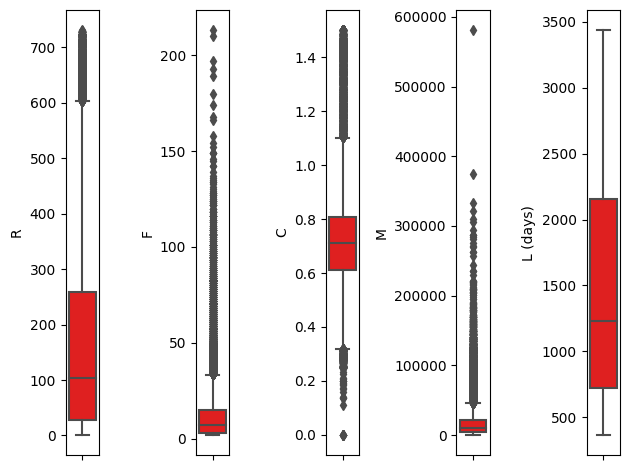

In [92]:
#outlier checking

list_features = list(df_new)

for i in range(0, len(list_features)):
    plt.subplot(1, len(list_features), i+1)
    sns.boxplot(y=df_new[list_features[i]], color='red')
    plt.tight_layout()

In [93]:
  for k, v in df_new.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column R outliers = 3.57%
Column F outliers = 7.51%
Column C outliers = 4.06%
Column M outliers = 7.59%
Column L (days) outliers = 0.00%


In [94]:
df_new['F'] = np.log10(df_new['F'] + 1)
df_new['M'] = np.log10(df_new['M'] +1)

In [95]:
  for k, v in df_new.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column R outliers = 3.57%
Column F outliers = 0.06%
Column C outliers = 4.06%
Column M outliers = 0.10%
Column L (days) outliers = 0.00%


In [96]:
#multicolienarity check (VIF score)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df_new)

vif_df = pd.DataFrame([vif(df_new.values, i) 
               for i in range(df_new.shape[1])], 
              index=df_new.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
0,R,2.577080
1,F,20.698299
2,C,15.495749
3,M,43.621485
4,L (days),4.207914


<Axes: >

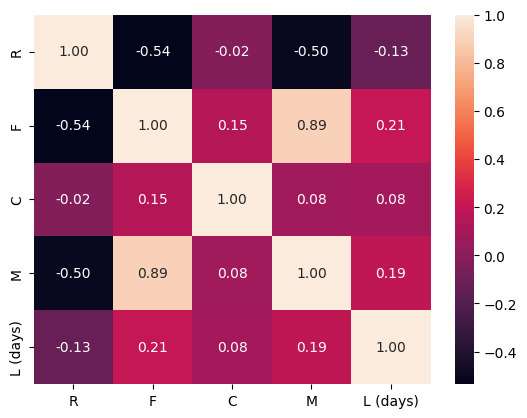

In [97]:
correlation = df_new.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [98]:
#drop features
#M and F has big correlation so one of them must be dropped
#drop SEG_KM_SUM(M) because it has the biggest vif_score and biggest corr with flight_count(F), drop the risk of overalying 

df_new = df_new.drop(columns='M')

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X_new = add_constant(df_new)

vif_df = pd.DataFrame([vif(X_new.values, i) 
               for i in range(X_new.shape[1])], 
              index=X_new.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,R,1.409841
2,F,1.473332
3,C,1.029705
4,L (days),1.047783


<Axes: >

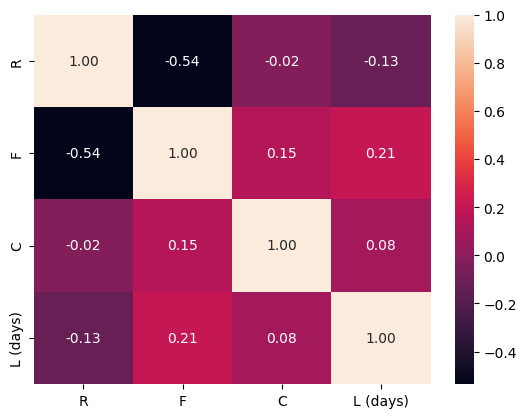

In [100]:
correlation = df_new.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [101]:
#scalling

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_new)
X_std

array([[-0.94293674,  3.79612908,  1.31060993,  1.48140186],
       [-0.88755305,  3.2697772 ,  2.90412308,  1.37309737],
       [-0.4112533 ,  1.190989  ,  2.01335704,  0.69708688],
       ...,
       [-0.45556026, -0.68887857, -3.91872022,  0.02702719],
       [-0.7878624 , -1.30106446, -3.91872022,  1.73966643],
       [ 1.26687253, -1.30106446, -3.91872022, -1.24168263]])

In [102]:
feats = ['R', 'F', 'C', 'L']

df_std = pd.DataFrame(data = X_std, columns = feats)
df_std

,R,F,C,L
0,-0.942937,3.796129,1.310610,1.481402
1,-0.887553,3.269777,2.904123,1.373097
2,-0.411253,1.190989,2.013357,0.697087
3,-0.920783,3.410931,1.359654,0.422160
4,-0.510944,2.814310,1.343528,0.927978
...,...,...,...,...
58250,1.471792,-1.301064,-3.918720,-1.221450
58251,0.696421,-1.301064,-3.918720,-0.494263
58252,-0.455560,-0.688879,-3.918720,0.027027
58253,-0.787862,-1.301064,-3.918720,1.739666


## Clustering

<Axes: >

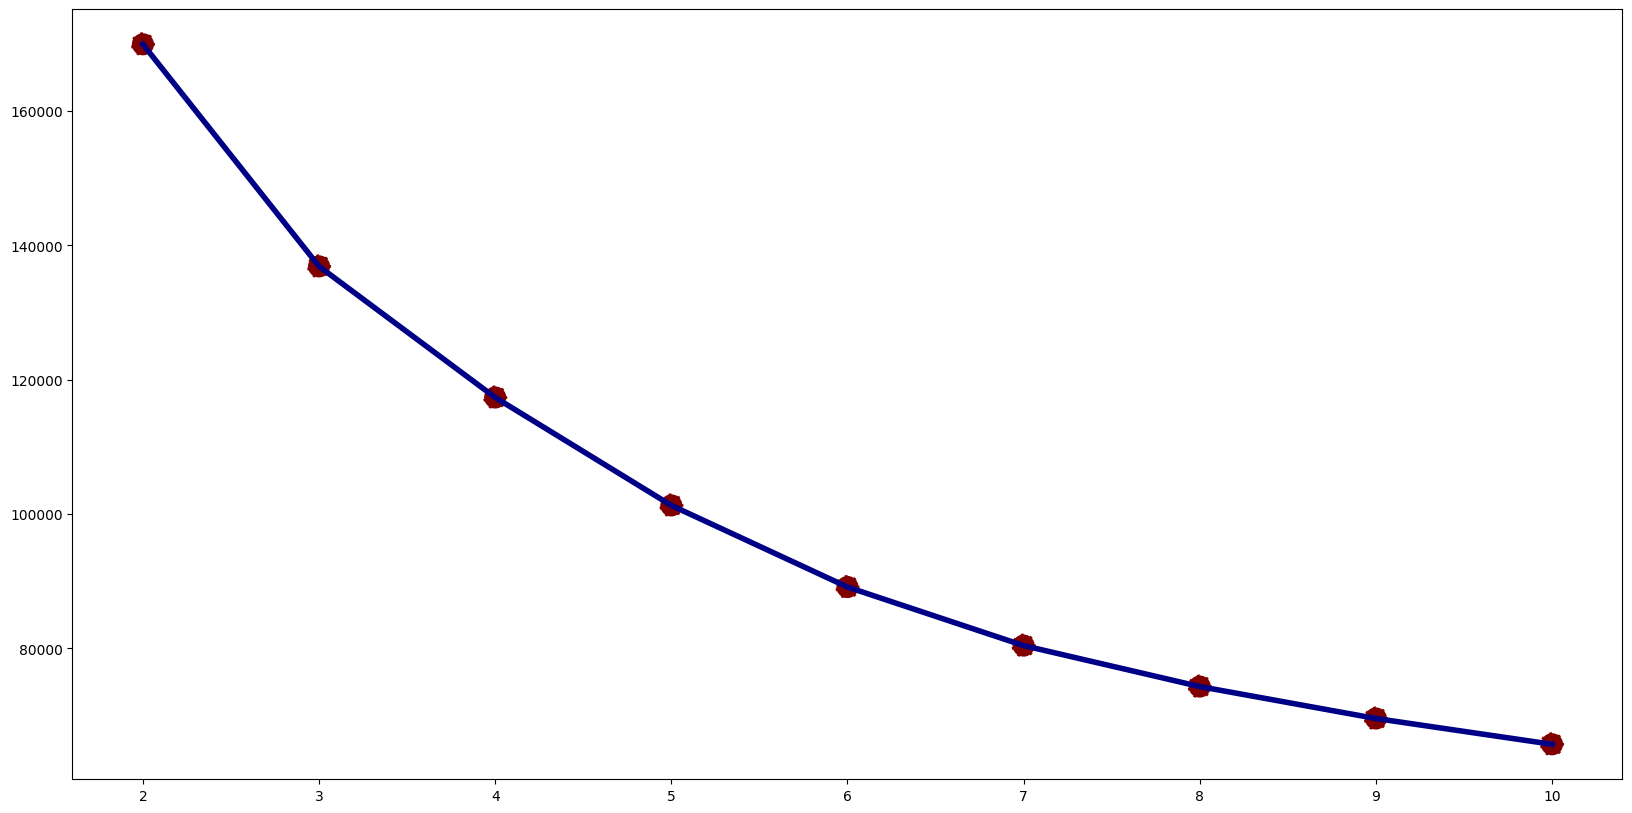

In [103]:
#elbow method

from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [104]:
#the candidate is k=3 and k=5, but still not sure. so we go with silhouette method

In [105]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [106]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    preds = kmeans.predict(df_std)
     
    score_euclidean = silhouette_score(df_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

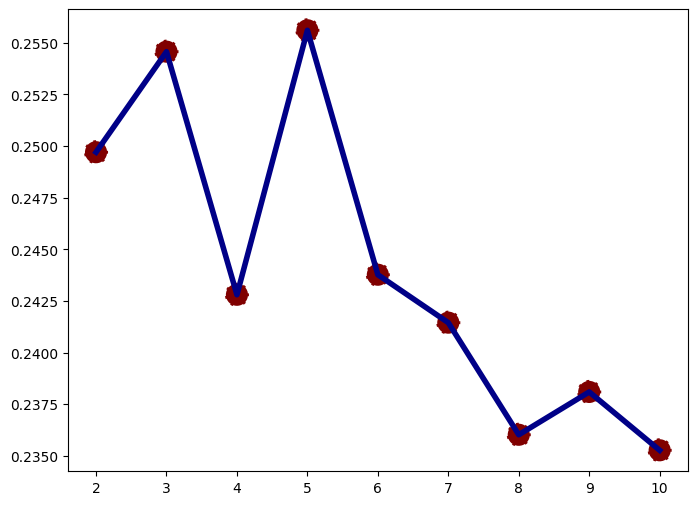

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [108]:
#clustering 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=14, n_init=300).fit(df_std)
df_std['clusters'] = kmeans.labels_
df_new['clusters'] = kmeans.labels_

In [109]:
#visualize cluster in 2D

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(X_std)
pcs = pca.transform(X_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_new['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,3.918996,0.837809,0
1,3.836307,2.252273,3
2,1.726209,1.676110,3
3,3.282375,0.573805,0
4,2.807627,0.951348,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

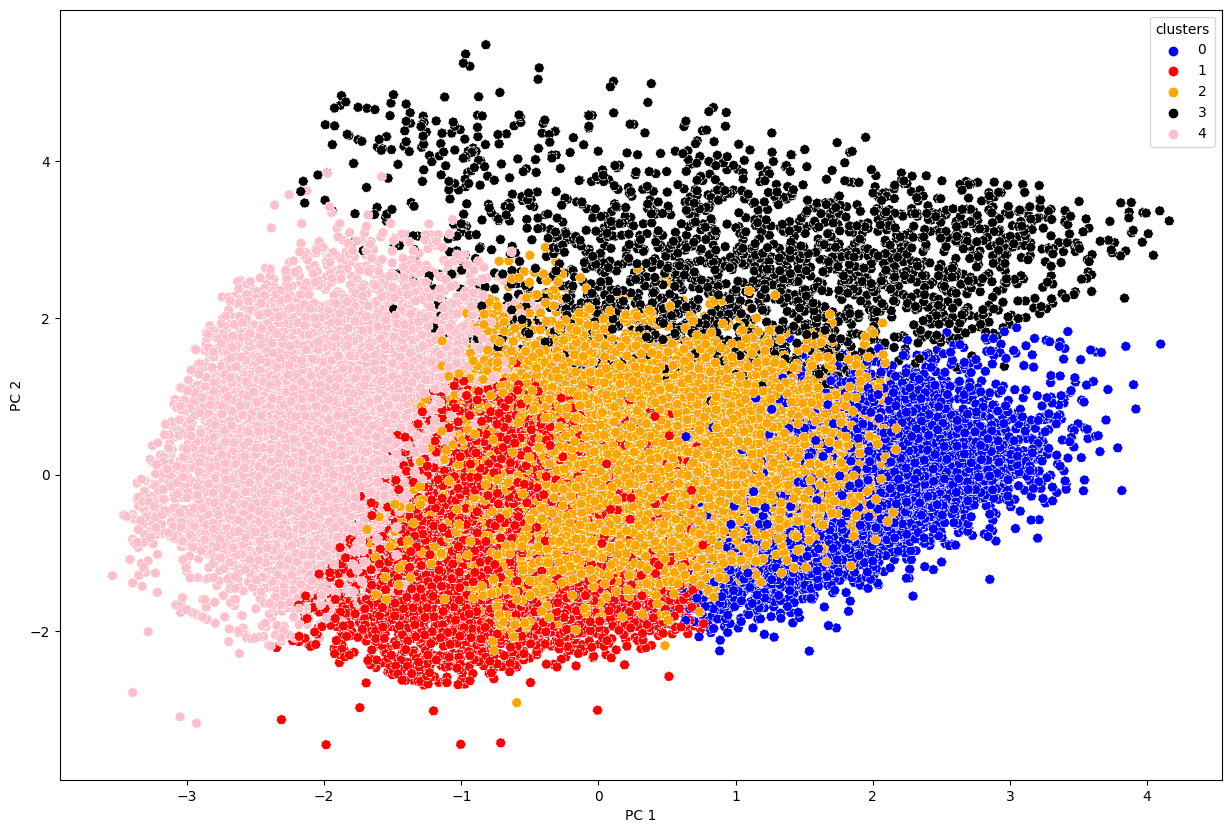

In [110]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['blue','red','orange','black','pink'],
    s=50,
    ax=ax
)

In [111]:
display(df_new.groupby('clusters').agg(['mean']))

,R,F,C,L (days)
,mean,mean,mean,mean
clusters,,,,
0,42.503691,1.448624,0.741640,1716.750275
1,113.279204,0.852282,0.671675,839.684878
2,131.188670,0.857302,0.687684,2491.922940
3,136.554612,1.037426,1.255581,1677.816343
4,483.443870,0.621566,0.701980,1159.106998


In [112]:
cluster_count = df_new['clusters'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage'] = round((cluster_count['count']/len(df))*100,2)
culster_count = cluster_count.sort_values('count')
cluster_count

,cluster,count,percentage
0,1,20408,35.03
1,0,12734,21.86
2,2,11809,20.27
3,4,10832,18.59
4,3,2472,4.24


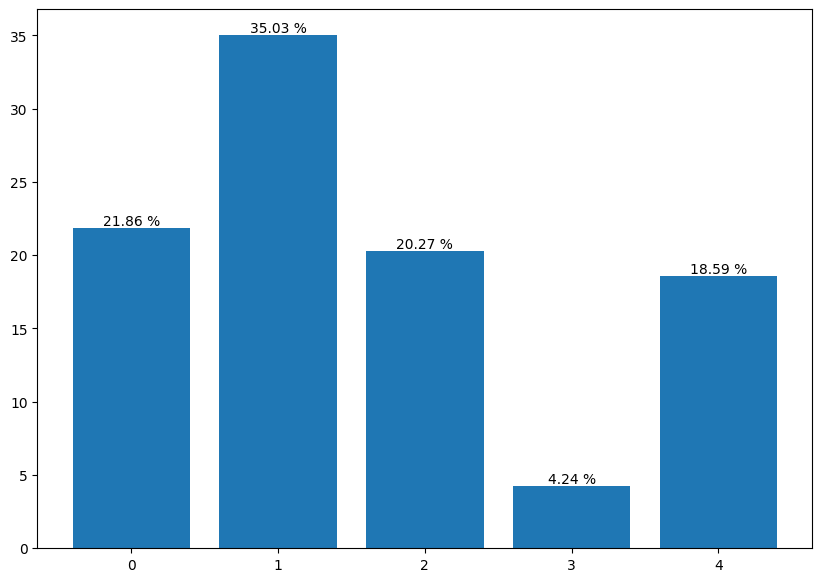

In [113]:
#cluster in bar chart

fig, ax = plt.subplots(figsize=(10,7))
bars = plt.bar(x=cluster_count['cluster'], 
              height= cluster_count['percentage'])

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

In [114]:
# grupby to check mean data (for radar chart)

avg_cluster_mean = df_std.groupby('clusters').mean().reset_index(drop=True)
avg_cluster_mean

,R,F,C,L
0,-0.713074,1.379773,0.114271,0.304037
1,-0.321093,-0.265819,-0.266194,-0.739810
2,-0.221904,-0.251964,-0.179141,1.226616
3,-0.192185,0.245082,2.909044,0.257700
4,1.729015,-0.902473,-0.101397,-0.359647


In [115]:
#radar chart from mean

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_mean.loc[i].values.tolist() + avg_cluster_mean.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_mean.columns.tolist() + avg_cluster_mean.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_mean.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 3])),title="Cluster based on Mean")

fig.show()

In [116]:
# grupby to check median data (for radar chart)

avg_cluster_median = df_std.groupby('clusters').median().reset_index(drop=True)
avg_cluster_median

,R,F,C,L
0,-0.832169,1.286914,0.100478,0.198410
1,-0.411253,-0.285642,-0.221916,-0.824532
2,-0.350331,-0.285642,-0.161568,1.194573
3,-0.516482,0.141806,2.951177,0.175202
4,1.698865,-0.956299,-0.045515,-0.602567


In [117]:
#radar chart from mean

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_median.loc[i].values.tolist() + avg_cluster_median.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_median.columns.tolist() + avg_cluster_median.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_median.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 3])),title="Cluster Based on Median")

fig.show()

In [118]:
#both mean and median depict the similar result

### Conclusion

**L (LENGTH)**

The number of months since the member ’s membership time from the end of the observation window = end time of the observation window-time to join (unit: month).

**R (RECENCY)**

The number of months since the customer ’s most recent flight to the end of the observation window = the time from the last flight to the end of the observation window (Unit: month).

**F (FREQUENCY)**

The number of times the customer took the company aircraft in the observation window = the number of flights in the observation window (unit: times])

**C (CUSTOMER COST)**

The average value of the discount coefficients corresponding to the passengers who traveled during the observation period = average discount rate (unit: none)

Bigger `R (Receny)` means they has not fly with us recently

Bigger `F (Frequency)` means they flight quite often

Bigger `C (Customer Cost)` means they use discount very often

Bigger `L (Length)` means they has been a member since a longer time


### Insights


In [119]:
display(df_new.groupby('clusters').agg(['mean']))

,R,F,C,L (days)
,mean,mean,mean,mean
clusters,,,,
0,42.503691,1.448624,0.741640,1716.750275
1,113.279204,0.852282,0.671675,839.684878
2,131.188670,0.857302,0.687684,2491.922940
3,136.554612,1.037426,1.255581,1677.816343
4,483.443870,0.621566,0.701980,1159.106998


1. **Cluster 0**  (champion) = This cluster use our service recently (averaging 1.5 months ago), the most frequent to fly, with the discount usage is average compare to others and has been a member for about 60 months or 5 years ago

2. **Cluster 1** (promising) = This cluster's recently use our service (around 4 months ago), pretty frequent to fly, and doesn't use lots of discount, the newest member (since 2.3 years ago) 

3. **Cluster 2** (loyal customer) = This cluster is average on recency of 4.5 months, pretty frequent using our service, and also average usage of dicsount, and the longest member (almost 7 years as a member)

4. **Cluster 3** (price sensitive) = This is also average on recency averaging 4.5 months, frequently use our service, use lots of discount, and has joined as a member for about 4.5 years ago (pretty long)

5. **Cluster 4** (hibernating) = This cluster last seen used our service 16 months ago (the worst among others), the lowest frequency, average usage of discount, and has been a member since 3 years ago (long enough)

 



In [120]:
cluster_count

,cluster,count,percentage
0,1,20408,35.03
1,0,12734,21.86
2,2,11809,20.27
3,4,10832,18.59
4,3,2472,4.24


- The Promising is the most of them, consist of 35% 
- The Champion is also in a good position with around 22%
- The Loyal Customer is quite a lot with 20%
- The Hibernating also quite a lot with 19%
- The Price Sensitive is not that much with only 4%

### Recommendation

1. **Cluster 1** (promising) = since they are the most among others, we need to put extra focus on this cluster. We need them to become a Loyal Customer or even champion. We need to maintain their frequency and their spending. 

- We need to expose our brand awareness to them so they won't forget our services. We can give updated programs, promo, special event to them through email marketing.
- create a point system. Where they can collect points to redeem a rewards


2. **Cluster 0** (champion) = we need to give some rewards to this cluster since they have already use our service pretty long time ago and the frequenct is pretty often.

- give special promo or discount to them (only for this cluster)
- create a gathering event for this cluster (present our new program, or new promo, so they can feel very exclusive and the first cluster to know that our releases), where they can promote more about our brand through their social media


3. **Cluster 2** (loyal customer) = this cluster need to be given a special and more personalized service since theey are very loyal

- give special promo or discount
- give hampers when they are having a birthday, or Chirstmas, or on Eid


4. **Cluster 4** (hibernating) = we need to poke this cluster so they recognize us and wanted to use our product again. I think this cluster only fly only on holiday recent fly averaging 1.2 years

- push notification 
- customized promo (especially on holiday season)

5. **Cluster 3** (price sensitive) = the least among others, so we dont really need to put focus on this one, but we can give a promo to them

- a promo that they will get discount for the next flight
- push discount notification


## Classification based on LRFMC 

In [121]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report

In [51]:
df_new

,R,F,C,L (days),clusters
0,1,2.324282,0.961639,2706,0
1,11,2.133539,1.254676,2615,3
2,97,1.380211,1.090870,2047,3
3,5,2.184691,0.970658,1816,0
4,79,1.968483,0.967692,2241,0
...,...,...,...,...,...
58250,437,0.477121,0.000000,435,4
58251,297,0.477121,0.000000,1046,1
58252,89,0.698970,0.000000,1484,1
58253,29,0.477121,0.000000,2923,2


In [128]:
df_new['clusters'] = df_new['clusters'].replace({0 : 'champion', 
                                                 1 : 'promising', 
                                                 2 : 'loyal customer', 
                                                 3 : 'price sensitive',
                                                 4 : 'hibernating'})

In [54]:
from sklearn.model_selection import train_test_split

#Split Dataset

X = df_new.drop(['clusters'],axis = 1)
y = df_new['clusters']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

Since the target variable is imbalance, i am going to use class weighting on the model

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=14, max_depth=3, class_weight='balanced')
dt.fit(X_train,y_train)
preds_dt = dt.predict(X_test)

In [56]:
# evaluation
print(classification_report(y_test, preds_dt))

                 precision    recall  f1-score   support

       champion       0.86      0.87      0.86      3208
    hibernating       0.87      0.95      0.91      2710
 loyal customer       0.00      0.00      0.00      2882
price sensitive       0.91      0.95      0.93       631
      promising       0.62      0.93      0.74      5133

       accuracy                           0.74     14564
      macro avg       0.65      0.74      0.69     14564
   weighted avg       0.61      0.74      0.66     14564



this is model is actually pretty decent if the `loyal custmoer` class hasn't got 0 on the score. so we can't use this model and we should different model.

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=14, class_weight='balanced')
rf.fit(X_train,y_train)
preds_rf = rf.predict(X_test)

In [58]:
# evaluation
print(classification_report(y_test, preds_rf))

                 precision    recall  f1-score   support

       champion       0.98      0.98      0.98      3208
    hibernating       0.99      0.99      0.99      2710
 loyal customer       0.98      0.98      0.98      2882
price sensitive       0.97      0.97      0.97       631
      promising       0.99      0.99      0.99      5133

       accuracy                           0.98     14564
      macro avg       0.98      0.98      0.98     14564
   weighted avg       0.98      0.98      0.98     14564



this model is very good since it has high score on all aspects (precision, recall, f1, and accuracy)

### SVM

In [59]:
from sklearn.svm import SVC

svm = SVC(random_state=14, kernel='linear', class_weight='balanced')
svm.fit(X_train,y_train)
preds_svm = svm.predict(X_test)

In [60]:
# evaluation
print(classification_report(y_test, preds_svm))

                 precision    recall  f1-score   support

       champion       0.92      0.93      0.92      3208
    hibernating       0.97      0.98      0.98      2710
 loyal customer       0.90      0.97      0.94      2882
price sensitive       0.89      0.87      0.88       631
      promising       0.99      0.94      0.97      5133

       accuracy                           0.95     14564
      macro avg       0.94      0.94      0.94     14564
   weighted avg       0.95      0.95      0.95     14564



this model also predict well, but the score is a it lower thatn random forest

## based on three models, the most suitable models to be used for LRFMC case is:
1. Random Forest
2. SVM
3. Decision Tree

### Random Forest Evaluation


In [61]:
print(classification_report(y_test, preds_rf))

                 precision    recall  f1-score   support

       champion       0.98      0.98      0.98      3208
    hibernating       0.99      0.99      0.99      2710
 loyal customer       0.98      0.98      0.98      2882
price sensitive       0.97      0.97      0.97       631
      promising       0.99      0.99      0.99      5133

       accuracy                           0.98     14564
      macro avg       0.98      0.98      0.98     14564
   weighted avg       0.98      0.98      0.98     14564



As we can see, the high accuracy and high precision, recall, and F1-score for all classes suggest that the model is well-suited for this multi-class classification problem.

1.  the model is good at not labeling negative samples as positive.
2. the model is good at not missing positive samples.
3. the model correctly predicts the class labels.

## Exloratory Data Analysis

In [123]:
df1 = df

In [130]:
df1 = df1.reset_index(drop = True)

In [131]:
df1['clusters'] = df_new['clusters']
df1.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50,champion
1,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,price sensitive
2,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12,price sensitive
3,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39,champion
4,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,92,313338,112364.0,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15,champion
